In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import cv2

In [3]:
os.getcwd() # displays current working directory

'/kaggle/working'

## Exploring Dataset

In [4]:
# Directory where all the images are stored
image_dir = "../input/barkvn50/BarkVN-50/BarkVN-50_mendeley"

In [5]:
# Total number or target classes
print("No. of bark texture categories: ",len(os.listdir(image_dir)))

No. of bark texture categories:  50


In [6]:
# Name of target classes/ bark texture categories
print(os.listdir(image_dir))

['Wrightia', 'Wrightia religiosa', 'Tamarindus indica', 'Lagerstroemia speciosa', 'Khaya senegalensis', 'Casuarina equisetifolia', 'Erythrina fusca', 'Melaleuca', 'Dipterocarpus alatus', 'Artocarpus altilis', 'Prunnus', 'Veitchia merrilli', 'Adenium species', 'Anacardium occidentale', 'Polyalthia longifolia', 'Ficus microcarpa', 'Melia azedarach', 'Spondias mombin L', 'Cananga odorata', 'Artocarpus heterophyllus', 'Gmelina arborea Roxb', 'Hevea brasiliensis', 'Dalbergia oliveri', 'Barringtonia acutangula', 'Syzygium nervosum', 'Persea', 'Carica papaya', 'Chrysophyllum cainino', 'Musa', 'Magnolia alba', 'Eucalyptus', 'Mangifera', 'Prunus salicina', 'Cedrus', 'Khaya senegalensis A.Juss', 'Ficus racemosa', 'Psidium guajava', 'Nephelium lappaceum', 'Tectona grandis', 'Pterocarpus macrocarpus', 'Delonix regia', 'Annona squamosa', 'Terminalia catappa', 'Cocos nucifera', 'Citrus grandis', 'Adenanthera microsperma', 'Acacia', 'Hopea', 'Senna siamea', 'Citrus aurantiifolia']


In [7]:
# Finding :- Total number of images 
#            Number of images in each class

total_images = 0
images_per_class = {'bark texture': [], 'no of images':[]}

for className in os.listdir(image_dir):
    path = image_dir + '/' + className
    images_per_class['bark texture'].append(className)
    images_per_class['no of images'].append(len(os.listdir(path)))
    
    total_images += len(os.listdir(path))

In [8]:
# Total no. of images available
print("Total no. of images available:", total_images)

Total no. of images available: 5578


Therefore only 5,578 images are given for training our model. To increase the number of training images, certain augmentation techniques has to be perfomed before training the model...

In [9]:
# Images per class dataframe (Converting dictionary into dataFrame)
images_per_class_df = pd.DataFrame(images_per_class)
images_per_class_df

,bark texture,no of images
0,Wrightia,97
1,Wrightia religiosa,100
2,Tamarindus indica,103
3,Lagerstroemia speciosa,96
4,Khaya senegalensis,95
5,Casuarina equisetifolia,97
6,Erythrina fusca,104
7,Melaleuca,107
8,Dipterocarpus alatus,158
9,Artocarpus altilis,104


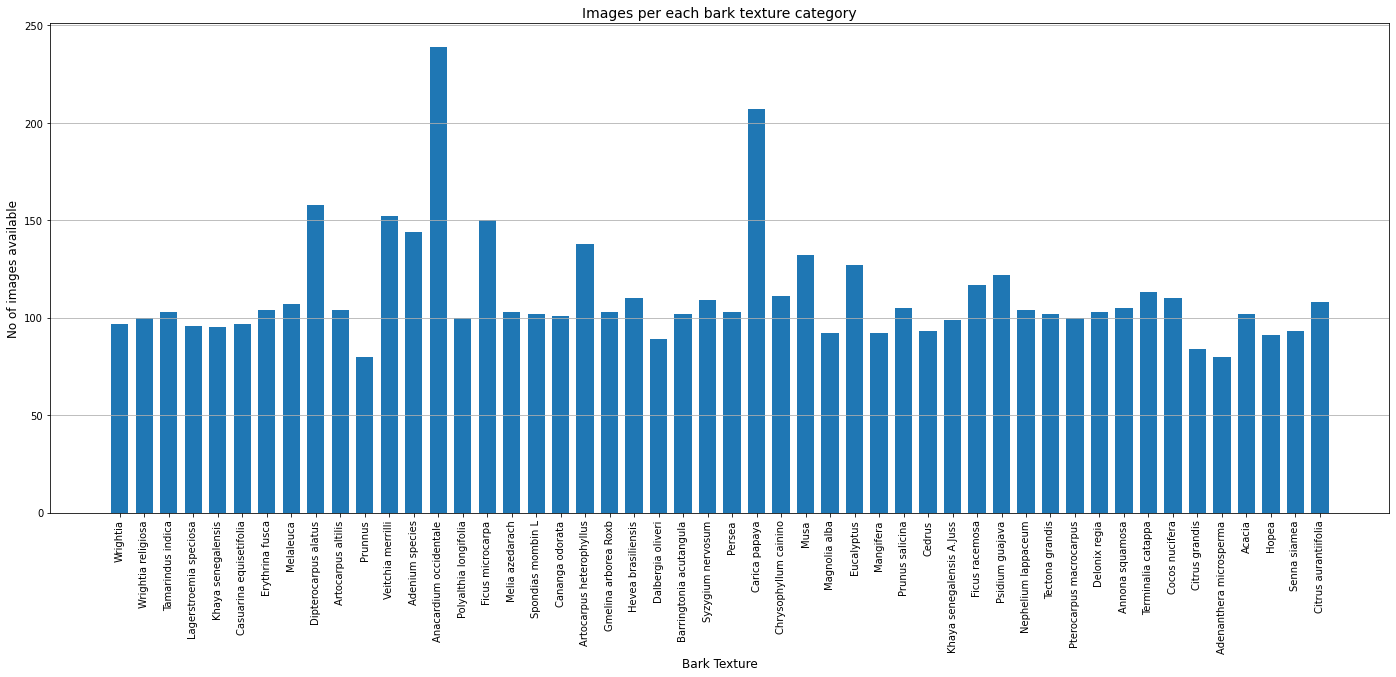

In [10]:
# Visulalising on graph
x = images_per_class_df['bark texture']
y = images_per_class_df['no of images']

plt.figure(figsize=(24,9))
plt.bar(x, y, width = 0.7)
plt.xlabel('Bark Texture', fontsize=12)
plt.ylabel('No of images available', fontsize=12)
plt.xticks(rotation=90)
plt.title('Images per each bark texture category', fontsize=14)
plt.grid(axis='y')
plt.show()

Insights from above bar plot:

* Highest number of images belongs to class "Anacardium occidentale" which are 239.
* All classes have approximately 100 images except some classes where number of images reaches to 150-200.
* We can see class imbalance in given dataset.

## Displaying Data

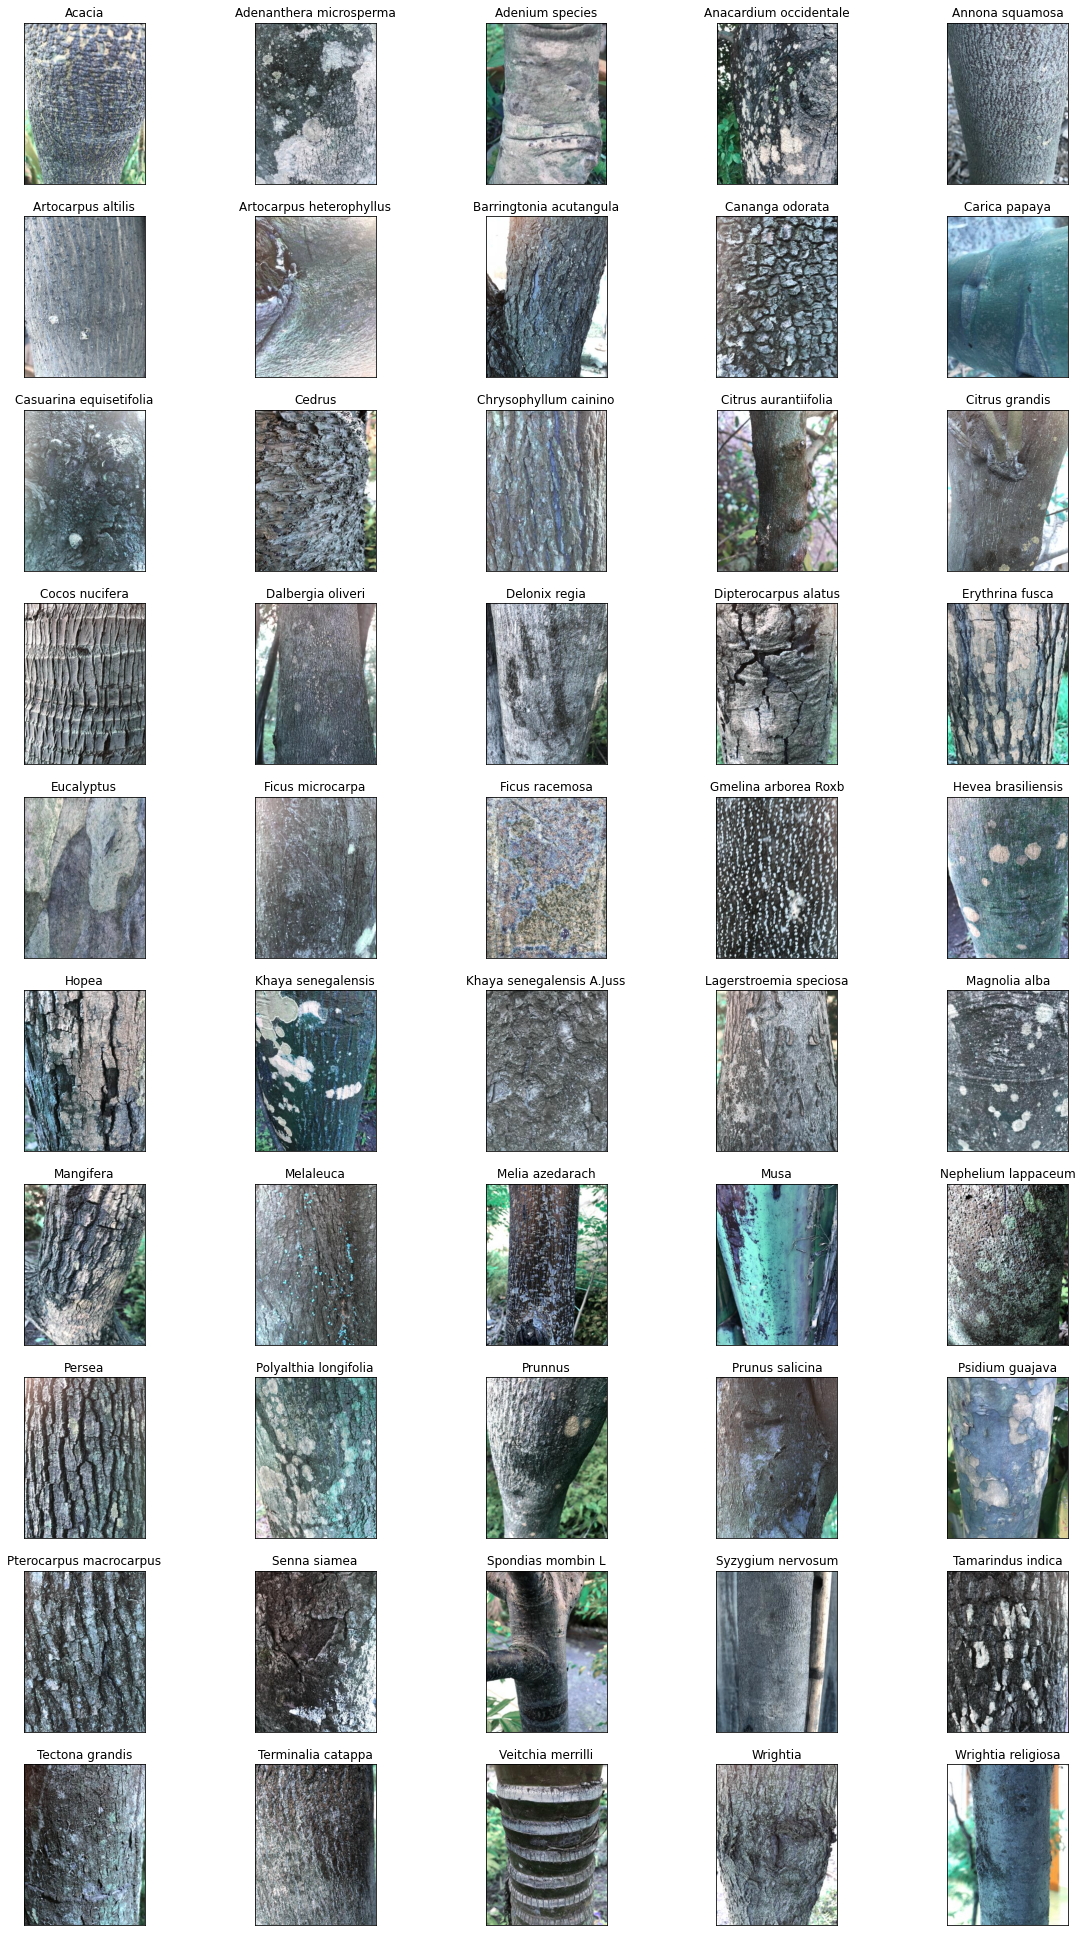

In [11]:
# Displaying 1 image from each class

plt.figure(figsize=(20,35))

classNames = os.listdir(image_dir)
classNames.sort()  # sorting class names in ascending order

for i in range(50):
    
    classImages = os.listdir(image_dir + '/' + classNames[i])
    img = cv2.imread(image_dir + '/' + classNames[i] + '/'+ classImages[i])

    plt.subplot(10,5,i+1)
    plt.gca().set_title(classNames[i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)

## Train Test Split
Splitting the image directory into train and test directories

In [12]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [13]:
import splitfolders

output_dir = os.getcwd() + 'barkvn50'
os.mkdir(output_dir)
splitfolders.ratio(image_dir, output=output_dir, seed=1337, ratio=(0.8,0.2)) 

Copying files: 5578 files [00:23, 239.08 files/s]


In [14]:
os.listdir(output_dir)

['train', 'val']

Images have been splitted successfully into two directories "train" and "val" for training and testing of model. The ration kept for training and testing images is 8:2

In [15]:
train_dir = output_dir + '/' + os.listdir(output_dir)[0]
test_dir = output_dir + '/' + os.listdir(output_dir)[1]

In [16]:
print("Number of classes in train directory: ", len(os.listdir(train_dir)))
print("Number of classes in test directory: ", len(os.listdir(test_dir)))

Number of classes in train directory:  50
Number of classes in test directory:  50


In [17]:
# Finding Number of images available for training and testing for few classes
print("Images available for training: \n")
for i in range(5):
    print(os.listdir(train_dir)[i], "contains ", len(os.listdir(train_dir + '/' + os.listdir(train_dir)[i])), "images")
    
print("\n\nImages available for testing: \n")
for i in range(5):
    print(os.listdir(test_dir)[i], "contains ", len(os.listdir(test_dir + '/' + os.listdir(test_dir)[i])), "images")

Images available for training: 

Wrightia contains  77 images
Hopea contains  72 images
Casuarina equisetifolia contains  77 images
Cocos nucifera contains  88 images
Delonix regia contains  82 images


Images available for testing: 

Wrightia contains  20 images
Hopea contains  19 images
Casuarina equisetifolia contains  20 images
Cocos nucifera contains  22 images
Delonix regia contains  21 images


## Image Augmentation and Loading

In [18]:
import keras
from keras.preprocessing import image

In [19]:
# Image augmentation using keras Image data generator

train_datagen = image.ImageDataGenerator( rescale=1./255, 
                                          rotation_range=25, 
                                          fill_mode='nearest',
                                          height_shift_range=0.2, 
                                          horizontal_flip=True, 
                                          vertical_flip=True,
                                          brightness_range=[0.4,1.5], 
                                          zoom_range=0.3)

test_datagen = image.ImageDataGenerator( rescale=1./255 )

In [82]:
# Reading Images directly from directory using keras flow from directory method

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(224, 224), 
                                                    batch_size=32, 
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    shuffle=True,
                                                    seed=42)

test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(224, 224), 
                                                  batch_size=32, 
                                                  class_mode='categorical',
                                                  color_mode='rgb',
                                                  shuffle=True,
                                                  seed=42)

Found 4444 images belonging to 50 classes.
Found 1134 images belonging to 50 classes.


## Building Model
Using pre-trained models due to very less amount of data

In [58]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten

In [83]:
# Loading Model
base_model = MobileNetV2(include_top = False, input_shape = (224,224,3), weights="imagenet", classes=50)

# Stop from being trainable
base_model.trainable = False

In [84]:
# Define the layers
inputs = keras.Input(shape=(224,224,3))

# Get the layer
x = base_model(inputs, training = False)

# Stack layers further
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(50, activation="softmax")(x)

# Combine the model
model = Model(inputs=inputs, outputs=x)

# Summary
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_4 ( (None, 1280)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 50)                64050     
Total params: 2,322,034
Trainable params: 64,050
Non-trainable params: 2,257,984
_________________________________________________________________


In [85]:
# Compiling the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Define callbacks to use
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

In [86]:
# Number of epochs
epochs = 10

# Training model
model.fit(train_generator, epochs=epochs, callbacks=[callback], validation_data = test_generator)

Epoch 1/10
139/139 [==============================] - 68s 476ms/step - loss: 2.5540 - accuracy: 0.3587 - val_loss: 1.2607 - val_accuracy: 0.6649
Epoch 2/10
139/139 [==============================] - 65s 470ms/step - loss: 1.3564 - accuracy: 0.6330 - val_loss: 0.8739 - val_accuracy: 0.7478
Epoch 3/10
139/139 [==============================] - 66s 474ms/step - loss: 1.0804 - accuracy: 0.7005 - val_loss: 0.7420 - val_accuracy: 0.7769
Epoch 4/10
139/139 [==============================] - 66s 472ms/step - loss: 0.9003 - accuracy: 0.7532 - val_loss: 0.6784 - val_accuracy: 0.7981
Epoch 5/10
139/139 [==============================] - 66s 473ms/step - loss: 0.8050 - accuracy: 0.7743 - val_loss: 0.6050 - val_accuracy: 0.8175
Epoch 6/10
139/139 [==============================] - 65s 471ms/step - loss: 0.7415 - accuracy: 0.7862 - val_loss: 0.6062 - val_accuracy: 0.8051
Epoch 7/10
139/139 [==============================] - 66s 472ms/step - loss: 0.7164 - accuracy: 0.7979 - val_loss: 0.5448 - val_ac

Getting maximum accuracy with MobileNetV2 model than VGG16 or ResNet50

## Making Prediction

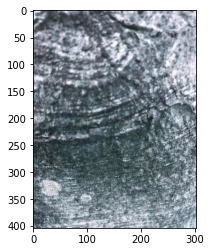

In [112]:
sample_class = os.listdir(test_dir)[12]
sample_class_path = test_dir + '/' + sample_class
sample_img_path = sample_class_path + '/' + os.listdir(sample_class_path)[5]

sample_img = cv2.imread(sample_img_path)
plt.imshow(sample_img)  # Displaying the image

In [113]:
# Preprocessing

sample_img = cv2.resize(sample_img, (224, 224))  # Image resizing
sample_img = sample_img / 255.0    # Image rescaling

In [114]:
test_img = np.reshape(sample_img, (1,224,224,3))  # reshaping image to be passes to model

# Predicting class of image
prediction = model.predict(test_img)
# Getting class with maximum predicted probability
class_maxProb = np.argmax(prediction)

In [115]:
# Printing the class name coressponding to the index as learned by model
trained_class_indices = test_generator.class_indices
print(trained_class_indices)

{'Acacia': 0, 'Adenanthera microsperma': 1, 'Adenium species': 2, 'Anacardium occidentale': 3, 'Annona squamosa': 4, 'Artocarpus altilis': 5, 'Artocarpus heterophyllus': 6, 'Barringtonia acutangula': 7, 'Cananga odorata': 8, 'Carica papaya': 9, 'Casuarina equisetifolia': 10, 'Cedrus': 11, 'Chrysophyllum cainino': 12, 'Citrus aurantiifolia': 13, 'Citrus grandis': 14, 'Cocos nucifera': 15, 'Dalbergia oliveri': 16, 'Delonix regia': 17, 'Dipterocarpus alatus': 18, 'Erythrina fusca': 19, 'Eucalyptus': 20, 'Ficus microcarpa': 21, 'Ficus racemosa': 22, 'Gmelina arborea Roxb': 23, 'Hevea brasiliensis': 24, 'Hopea': 25, 'Khaya senegalensis': 26, 'Khaya senegalensis A.Juss': 27, 'Lagerstroemia speciosa': 28, 'Magnolia alba': 29, 'Mangifera': 30, 'Melaleuca': 31, 'Melia azedarach': 32, 'Musa': 33, 'Nephelium lappaceum': 34, 'Persea': 35, 'Polyalthia longifolia': 36, 'Prunnus': 37, 'Prunus salicina': 38, 'Psidium guajava': 39, 'Pterocarpus macrocarpus': 40, 'Senna siamea': 41, 'Spondias mombin L':

In [116]:
print("Actual class: ", sample_class)
print("predicted class: ", {m for m in trained_class_indices if trained_class_indices[m] == class_maxProb})

Actual class:  Magnolia alba
predicted class:  {'Magnolia alba'}
